The goal of this notebook is to evaluate the embeddings that we have created. Specifically, we are interested in how well (both qualitative and quantitatively) our embeddings do at matching questions with context in the statement portion of the earnings call transcript. Since we divided the statements portion of each earnings call transcript into chunks of size at most 64 words, this reduces to matching each question with the statement chunk that is most "similar" in terms of some predefined similarity metric (e.g. cosine similarity).

In [3]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [4]:
# Change this to point to your embeddings
FILE_PATH = 'embeddings/bag_of_words.pickle'

In [5]:
with open(FILE_PATH, 'rb') as f:
    transcript_embeddings = pickle.load(f)

In [6]:
def cosine_sim(u, v, sparse=False):
    if sparse:
        u = u.toarray().T
        v = v.toarray().T
    u = np.reshape(u, (u.shape[0],))
    v = np.reshape(v, (v.shape[0],))
    return np.dot(u.T, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [7]:
def jaccard_sim(u, v, sparse=False):
    if sparse:
        u = u.toarray().T
        v = v.toarray().T
    return np.sum(np.minimum(u, v)) / np.sum((u + v))

In [8]:
# Define this as you see fit
sim_func = cosine_sim

In [9]:
NUM_SAMPLES = len(transcript_embeddings)

In [10]:
q_to_chunk = []
scores = []
for i in range(NUM_SAMPLES):
    curr = {}
    for q_a_idx in range(len(transcript_embeddings[i][1])):
        if transcript_embeddings[i][1][q_a_idx][1] == 1: continue  # This is an answer
        q_embedding = transcript_embeddings[i][1][q_a_idx][0]
        
        curr_best_score, curr_best_chunk = None, None
        for chunk_idx in range(len(transcript_embeddings[i][0])):
            chunk_embedding = transcript_embeddings[i][0][chunk_idx]
            score = sim_func(q_embedding, chunk_embedding, sparse=True)
            
            if curr_best_score is None or score > curr_best_score:
                curr_best_score = score
                curr_best_chunk = chunk_idx
        scores.append(curr_best_score)
        curr[q_a_idx] = curr_best_chunk
    q_to_chunk.append(curr)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


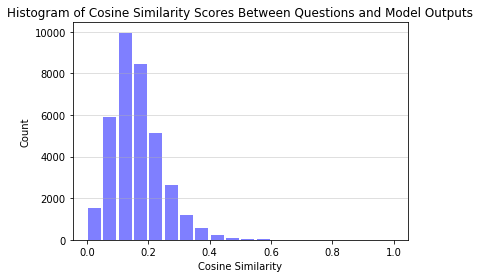

In [11]:
num_bins = 20
n, bins, patches = plt.hist(scores, num_bins, facecolor='blue', alpha=0.5, rwidth=0.85)
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Cosine Similarity')
plt.ylabel('Count') # Adjust if using Jaccard Similarity
plt.title(r'Histogram of Cosine Similarity Scores Between Questions and Model Outputs')
plt.show()

In [12]:
# Now we load the original transcripts (only using the training data for now)
with open('data/transcripts_train.pickle', 'rb') as f:
    transcripts = pickle.load(f)

In [18]:
for i, mapping in enumerate(q_to_chunk):
    print(len(mapping.keys()))
    for q_idx in mapping.keys():
        # Special case where an analyst is the last speaker in the Q&A session
        if q_idx == len(transcripts[i][3]) - 1: break
        print("START")
        print(q_idx)
        print ("QUESTION TEXT:\n")
        print(transcripts[i][3][q_idx][0])
        print("\nANSWER TEXT\n")
        print(transcripts[i][3][q_idx + 1][0])
        print("\nMODEL OUTPUT:\n")
        print(transcripts[i][2][mapping[q_idx]] + '\n')
        print('#' * 75)

3
START
0
QUESTION TEXT:

operator instructions first question comes line bruce geller dghm please proceed hi good morning guys

ANSWER TEXT

hi bruce

MODEL OUTPUT:

questions please feel free butt ask question want

###########################################################################
START
2
QUESTION TEXT:

good thanks glad hear things turned around far current quarter 7 negative comp related 13 weeks versus 14 weeks

ANSWER TEXT

yes includes additional week last year looking comparing 14 weeks 13 weeks year dismal might imply comp could come something like 2 probably somewhere along line 2 3

MODEL OUTPUT:

two oyster house properties alabama productive properties think made good purchase consideration acreage buildings bought one gulf shores part mall previous owners owned thought bought good price thought made good real estate transaction well buying two productive restaurants think executing well looked last 11 weeks really well majority restaurants fourth quarter past fi

QUESTION TEXT:

thank next question comes line colin radke wedbush securities question please salad kits revenue guidance imply much rebound second half appreciate everything going costco time mentioned expect rebound salad kit market canada also another slot sam wondering would improved growth trajectory second half

ANSWER TEXT

think seeing lot timing issue first costco big part business appreciate going back costco sweet kale salad business staying flat pretty dramatic increase retail business timing get like walmart growth going see grow another spot wo till april growth canada right growth lot make costco loss see flat rest year get distribution gains see kind kicking fiscal year

MODEL OUTPUT:

vegetable business revenues also impacted unexpected much lower market growth salad kits canadian retail market projecting partially resulted recall competitor salad product january last year also costco deciding move strategy salad kits interesting note costco decision move salad kits ma


open one opportunities talk obviously talking anybody things obviously anything comes definitely would let everybody know discussions currently talk things

MODEL OUTPUT:

promising early trials may subsequently prove viable safety efficacy grounds products may receive regulatory approval market acceptance competition may reduce commercial potential products may experience product recalls manufacturing issues product liability patent may challenged unenforceable although statements help provide complete information company statements may less reliable historical information company undertakes obligation update publicly statements except required law please refer recent quarterly annual reports filed

###########################################################################
START
48
QUESTION TEXT:

right thank next question comes richard butcher argonne capital hi nader

ANSWER TEXT

hi richard good thank

MODEL OUTPUT:

thank mike greetings everyone thank joining us today today call


ANSWER TEXT

well first think want make sure different policy changes contemplated people really understand auto industry understand long lead decisions products launching right made two three four years ago also capital intensive business think people understand also understand right general motors 40 manufacturing facilities united states provide jobs last two years invested 11 billion united states also either preserved jobs increased jobs perspective last years increased 11 broaden jobs country many brought company many brought country made move well made shifts engineering foot print want make sure people understand industry general motors specifically look also look produce produce upwards three quarters almost 80 total vehicles produced us look sales providing strong job look instance products talked comes point look officially many vehicles going sell make investment worthwhile cases products mexico bilateral trade agreements another important point want make look difference g

yeah think well type networks middle east asia yes couple big ones us important get right channel address southeast asian countries time working nokia revenue asia 95 nokia channel absence nokia channel become competitor region meant got develop alternate channel able address opportunities places like indonesia malaysia philippines whilst working things would able us point announce

MODEL OUTPUT:

densification optimization project shipments commence q4 overall horizon enhanced gaining good acceptance north american market backlog opportunity pipeline market strengthened result since last call also able make announcements new relationships outside north america november announced extension multimillion dollar project tier 1 mobile operator argentina together local partner tia represents largest project argentina project legacy radios replaced dragonwave harmony trunk radios provide backhaul scalability needed

###########################################################################


START
46
QUESTION TEXT:

okay question bob mentioned new deposit clients came wealth management course year curious many might constellation customers versus customers principally first republic wealth management became bank side customers

ANSWER TEXT

would say material constellation clients became bank clients vast majority breadth referrals private wealth professionals clients bank

MODEL OUTPUT:

let take moment speak collaborative approach take first republic look fully serve clients financial needs across wealth management banking services private wealth management continues strong contributor total deposits wealth management sweep accounts also source new deposit clients bank example 2016 wealth management clients became new deposit relationships due team based approach across entire enterprise overall pleased growth wealth management well continued opportunities ahead bring

###########################################################################
START
48
QUESTION TEXT:

ok

actual deal structured way alignment partners example assuming government would 10 upstream 10 pipeline basically means pipeline become treat capital cost develop field way partners looking pipeline would financed 60 40 60 debt 40 equity

MODEL OUTPUT:

okay like turn call q 100 people call usual could ask one question per person hard stop clock latest thank much

###########################################################################
START
32
QUESTION TEXT:

next question comes david gamboa tudor pickering holt company please go ahead hi thanks good morning question around jubilee mentioned release still determining fpso require rotation expect reach decision approval first half year wondering need decision approval starting works 12 week shutdown independent trying figure timing potential shutdown thank

ANSWER TEXT

yes thanks basically important decision us would take decision ahead shutdown shutdown rotate work shutdown would rotation activities also shutdown think best way th

START
38
QUESTION TEXT:

okay thanks lot guys thank next question comes line kyle voigt kbw hi good afternoon greenwich advisor compliance services think started rollout subsidiary third quarter wanted get update still adding significant functionality headcount give us indication whether seeing interest fas feedback advisor community early rollout

ANSWER TEXT

yeah early rollout encouraging yes definitely focusing adding capabilities regularly especially registered investment advisors previously worked bulge bracket brokers tend come ask going independent

MODEL OUTPUT:

even seamless registered financial advisors achieve independence launch greenwich advisor compliance services greenwich compliance provides registration compliance assistance new existing ria business going independent means rias keep fees earn given increase advisors looking become independent low commission financing rates greenwich compliance assistance believe right formula continued growth segment globally invest

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




18
QUESTION TEXT:

great helpful maybe one final one dan update three larger credits got added last quarter

ANSWER TEXT

great question two foundry related one cro place operations improving cautiously optimistic happy progress second foundry liquidating chapter 11 expect resolution end quarter situation feel pretty comfortable outlook point healthcare related part q4 related point feel like properly reserved working situation hope helps brad

MODEL OUTPUT:

million prior quarter 524 million continue gain market share added 76 net new clients fourth quarter 330 net new clients year also starting see positive trends average invoice size purchase quarter increased versus prior quarter increase nearly 6 number invoices purchased increased current quarter year 2016 purchased million invoices total factoring revenue triumph business capital increased quarter 8 previous quarter million million year consistent

###########################################################################
STAR

###########################################################################
START
26
QUESTION TEXT:

stephanie believe time one question final question comes robert spingarn credit suisse line open good morning thanks squeezing couple cleanup things marillyn go back sustainment discussion discussion negotiations dod lrip 10 anything else consideration defer future competition either sustainment block 4 subsystem upgrade work bruce potential competition contemplated outlook aircraft last thing wanted ask important 450 unit international block buy margin growth cadence described ron earlier

ANSWER TEXT

thanks question rob guess first question sustainment sustainment separate contract lrip 10 part discussion lrip 10 negotiations would upgrade work block 4 going

MODEL OUTPUT:

order quantities bar graph portion chart shows historical projected orders also observe dark descending line graph shows per unit price ctol variant lrip notated axis right see latest status lrip 9 current around 


yes think need get full commercial release new territory us think done everything optimize positioning ahead full commercial release would level specificity detail really pleased mentioned 40 installs went competitive accounts think speaks appealing processes variety surgeons get full commercial release look see additional data make sense candidly five years know successful execution captured meaningful market share premature right put specific targets expect

MODEL OUTPUT:

thanks kevin comments today call include update mako completed 2016 achieving continued success mako installed total 32 robots globally 24 full year mako installations totaled 86 increase 14 brings total number robots globally 381 333 q4 expanded limited market release include additional sites serve us training centers move towards full commercial release upcoming aaos meeting also important note addition installing new robots q4 mako

###########################################################################
STA


ANSWER TEXT

well mean think general us business less variable time less times little bit less way us business works serve entire economy us diversified diversified canada big projects bigger impact think probably basic dynamic

MODEL OUTPUT:

solid expense management business canada still underperforming making progress also met expectations quarter better expected sales performance month december us canada exceeded sales expectation month december partially attribute favorable timing year holidays customer spending single channel online business primarily zoro us monotaro japan continued perform quite well growing revenue earning strongly quarter far january seeing softness believe related extend vacations occurred early january due

###########################################################################
START
96
QUESTION TEXT:

okay kind first quarter gross margin 30 fourth quarter going 80 130 first quarter mentioned comp mean think already changed counting trade show stuff la


quick framework know 250 growth petabytes managed data public cloud big would say public cloud either percentage software business percentage total petabytes would say manage commvault platform

ANSWER TEXT

think small percentage managed petabytes stage seen industry factors somewhere around 7 adoption burdened facts indiscernible think early point adoption

MODEL OUTPUT:

commvault aws snowball commvault customers enormous flexibility move product workloads cloud monday press release enterprise customer dow jones discussed move 50 infrastructure cloud leveraging commvault ability protect data cloud wherever data resides address current q4 2017 fy 2018 financial outlook strong progress business first three quarters fy 2017 positions us continue deliver solid software revenue earnings growth fy 2018 believe given current funnel positioned

###########################################################################
START
8
QUESTION TEXT:

percentage revenue

ANSWER TEXT

percentage rev

mike bell one last comment last call guess look back would say hey really good accomplishment achieved one thing get done hope firm gets done

ANSWER TEXT

interesting question would say feel best capital management discipline overall firm also applying business client level mike feel best would say terms work still needs get done sure eric thoroughly enjoyable time dealing regulatory issues mean still lot wood chop area love gotten done left think would still remain chop

MODEL OUTPUT:

capital shareholders turn call mike want welcome eric aboaf moving cfo role early march eric joined us december us today speaking role today call eric speaking first quarter call april 26th also like take moment thank mike bell work supporting firm key initiatives would like turn call mike review financial performance fourth quarter well outlook 2017 following mike available answer questions mike

###########################################################################
START
34
QUESTION TEXT:

next 

START
16
QUESTION TEXT:

okay great thank next question comes casey whitman sandler please go ahead hey good morning

ANSWER TEXT

hi casey good morning

MODEL OUTPUT:

good morning welcome wesbanco fourth quarter 2016 earnings conference call participants mode operator instructions today presentation opportunity ask questions operator instructions please note event recorded would like turn conference john iannone vice president investor relations please go ahead

###########################################################################
START
18
QUESTION TEXT:

ask one question fee income quarter seemed like little bit full quarter contribution ycb coming maybe walk movements saw quarter get better idea run rate

ANSWER TEXT

yes think terms fee income overall deposit charges pretty significantly little 1 million fourth quarter versus fourth electronic banking fee trust fees million swap fee income came well disappointed brokerage business part moved external focus brokers looking ad

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)





MODEL OUTPUT:

affect actual results specific statements include limited indications regarding financial services industry economy future growth balance sheet income statement please refer press releases form 10k concerning factors could cause actual results differ materially statements please note event recorded would like turn conference mike rechin president ceo please go ahead

###########################################################################
START
24
QUESTION TEXT:

maybe one mark margin remind mark assets price full prime libor break assets rate sensitive remind

ANSWER TEXT

billion priced immediately looking got give second give exact number think split equally prime libor actually edged libor little bit higher 1 billion exactly tied prime libor based loans actually almost billion rest tied treasuries rolled curve bucket

MODEL OUTPUT:

loans 305 million assets 260 million deposits strong earning company young company 19 years old consistent earner strong net intere

START
14
QUESTION TEXT:

great follow wajid analyst day talked considering taking maybe lower margin fingerprint sensing business china felt accretive earnings operating profit talk whether reflected march quarter guidance

ANSWER TEXT

john longer term statement longer actually q3 none business talking actually reflected q3 guidance

MODEL OUTPUT:

march quarter gaap expenses expected include charges approximately 14 million intangibles amortization approximately 12 million reflected cost sales provide outlook data march quarter taking account overall revenue mix expect gross margin march quarter 32 34 expect operating expenses march quarter range approximately 90 million 93 million using midpoint q3 guidance operating profit would approximately revenue anticipate liability based tax rate q3 range 12 14

###########################################################################
START
16
QUESTION TEXT:

thank take next question charlie anderson dougherty co please go ahead line open y

next question comes steven alexopoulos morgan please go ahead please go ahead hi everybody first congratulations mike great news first question expenses 2016 expenses 12 right original high single digit guidance 2017 still looking high single digit range higher base 2016 effectively raising forecast expenses 2017 driving infrastructure regulatory compliance thanks

ANSWER TEXT

things think steve tried highlight notable items q4 clearly right gave outlook 2017 let kind remind us notable items expenses may heard remarks increased provision unfunded credit commitments amounted around million like 1 total expenses entire year quite sizable item item point expenses million incentive compensation increase related stock price increase incentive compensation certain leaders organization tied stock price saw unusual dramatic lift stock prices particular stock price fourth quarter look two items alone something would expect see every single quarter enter 2017 would necessarily expect see 2017 h

2
QUESTION TEXT:

helpful memorials little bit casketed death still sort growth expectation going forward

ANSWER TEXT

well seen past casketed death continues cyclical event expect death rate increase course time quarter next ca tell would expect sales gains seen course quarter taper stabilized end think relatively low single digit topline growth business moved forward probably improving bottom line

MODEL OUTPUT:

resulting market share gains operating improvements cremation division saw strong sales backlog growth quarter recent large european incineration project increased expectations good year group well industrial segment continued perform well good marking equipment ink sales saw difficult comparables warehouse automation businesses first quarter 2016 strong quarter segment comparables aligned quarters come continue expect good things business going forward ramp research development division 6 million

###########################################################################



###########################################################################
START
46
QUESTION TEXT:

great thank next question question line brian bedell deutsche bank please proceed question thanks taking maybe ken go back expense commentary want make sure right expenses 2 excluding sales distribution marketing expense instead

ANSWER TEXT

thanks regarding know look look sales distribution look revenue net expenses know number expect number net number kind appendix presentation give detail expect less flat probably increasingly latter part year given current aum levels course function sales current aum levels expect line fairly consistent maybe upward trend later year

MODEL OUTPUT:

thank good morning thank joining ken lewis discuss quarter results hope chance read commentary morning find written transcript approach providing commentary useful importantly investment performance peers benchmarks improved significantly quarter although continue experience outflows believe much better

START
36
QUESTION TEXT:

next question comes thijs berkelder please go ahead reservoir descriptions ph see recovery especially maybe explain q4 drives revenues versus international decline

ANSWER TEXT

yes look driven production enhancement unit really land revenue 13 lead production enhancement 15 look reservoir description international 3 see activity levels north america behind carry lower levels international activity still outperform relative basis 3 versus north america 15 production enhancement

MODEL OUTPUT:

good morning welcome core laboratories fourth quarter 2016 earnings conference call participants mode operator instructions today presentation opportunity ask questions operator instructions please note event recorded would like turn conference david demshur chairman president ceo please go ahead

###########################################################################
START
38
QUESTION TEXT:

okay looking sequential improvement huge jump activity sequentially looking 

START
20
QUESTION TEXT:

okay good added color thank stephen one last quick one nicole terms prepays impact quarter also impact interest reversal

ANSWER TEXT

yeah give one moment let pull talking nim yields

MODEL OUTPUT:

thank stephen pleased joining nicole call today get started like say excited looking forward accomplishing lot together enter 2017 since joining opus worked internal credit administration team perform comprehensive review portfolio also analyzed results loan review performed outside consulting firm comments today provide overview occurred fourth quarter regarding asset quality summarize current conditions finally share process improvements made answer specific questions q fourth quarter

###########################################################################
START
22
QUESTION TEXT:

nim dollar value whatever

ANSWER TEXT

yes sorry give one second okay reversal sorry let see reversal interest point impact nim quarter said prepayment fees well point benefit nim 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

